# Tarea01. Métodos kernel para clasificación
## David Montero Loaiza
Para esta tarea llevarás a cabo una clasificación binaria sobre un data set tu elección.

Es preferible que uses un conjunto de datos de tu propio ámbito (estudios, trabajo, investigación, etc.) sobre el cual defines un problema de clasificación binaria. Alternativamente puedes usar un conjunto de datos público. Puedes encontrar data sets usando por ejemplo Google Dataset Search: https://datasetsearch.research.google.com/.

Importante: No uses ninguno de los data sets del UCI Machine Learning Repository, dado que están "sobredocumentados" para este tipo de tareas.
Pasos a seguir:

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Support Vector Machines
from sklearn import svm

# Separar entrenamiento y test
from sklearn.model_selection import train_test_split

# Graficos
import seaborn as sns
import matplotlib.pyplot as plt

# Medicion de tiempo
from time import time

# Busqueda de mejores parametros
from sklearn.model_selection import GridSearchCV

# Reporte de clasificacion y matriz de confusion
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

### 1. Elige un conjunto de datos para clasificación binaria. (Es decir, debe incluir etiquetas binarias.)

Se eligió un dataset de kaggle (https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset/data). Este dataset contiene registros de canciones de Spotify en donde la variable objetivo binaria se basa en si la canción ha sido un hit (es decir, si ha entrado en la lista semanal de las 100 canciones más populares Billboard) o si no lo ha sido.

El dataset consta de 19 variables, de las cuales una es la variable objetivo. Se usaron un total de 15 variables predictoras ya que 3 de ellas corresponden a valores alfanuméricos que identifican el nombre de la canción, el artista y el id de Spotify.

Cabe resaltar que, de diferentes décadas, sólo se usó el dataset de la década de los 2000s.

In [2]:
songs = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/00-datasets/the-spotify-hit-predictor-dataset/dataset-of-00s.csv")

### 2. Visualiza (algunos de) los datos.

Las variables a usar serán:

- danceability
- energy
- key
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo 
- duration_ms
- chorus_hit
- sections

In [3]:
predictors = ["danceability","energy","key","loudness","speechiness","acousticness","instrumentalness","liveness",
              "valence","tempo","duration_ms","chorus_hit","sections"]

In [4]:
predictors_target = predictors.copy()
predictors_target.extend(["target"]) # Solo para efectos de visualizacion

Todas las variables son numéricas y generalmente recorren un rango de 0 a 1, exceptuando algunas, como loudness, que al representar decibelios recorre el rango de -60 dB a 0 dB. La descripción de cada variable se encuentra en el link proporcionado de kaggle.

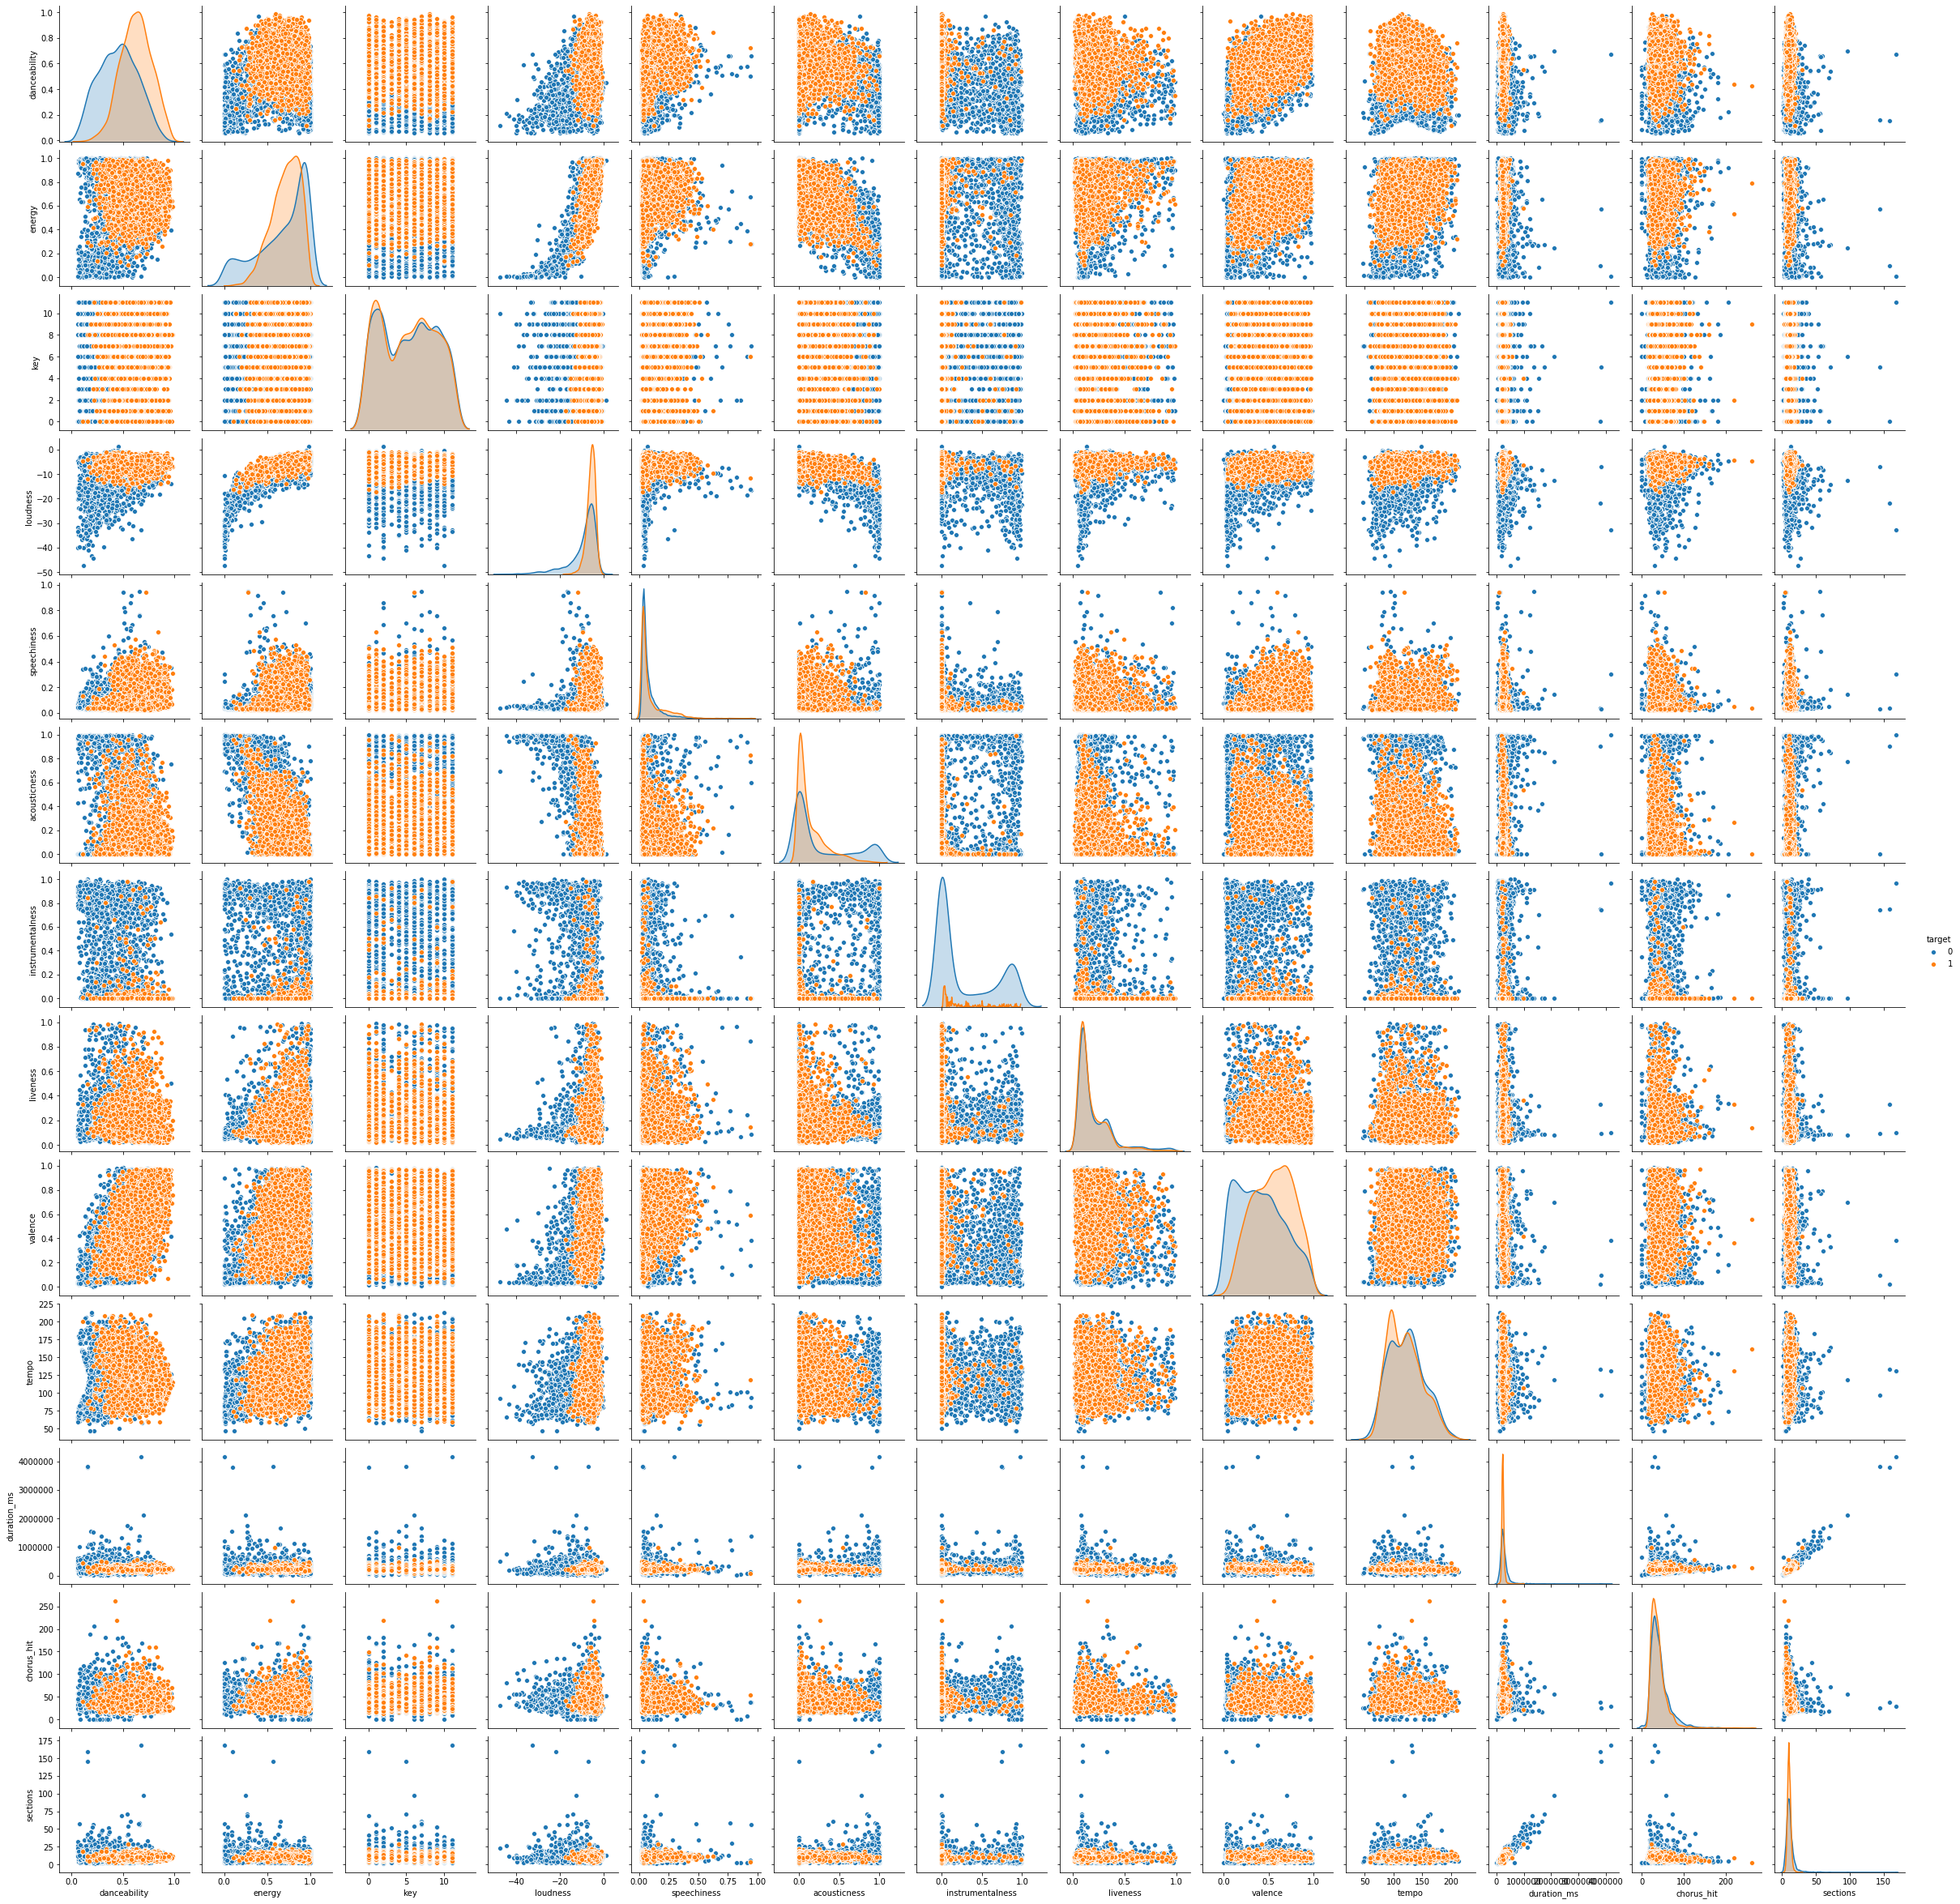

In [5]:
sns.pairplot(songs[predictors_target],hue = 'target')

### 3. Separa los datos en un conjunto de training y otro de test.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(songs[predictors],songs["target"],test_size = 0.25,random_state=0)

print('Tamaño de Entrenamiento: ' + str(X_train.shape))
print('Tamaño de Test: ' + str(X_test.shape))

Tamaño de Entrenamiento: (4404, 13)
Tamaño de Test: (1468, 13)


### 4. Entrena una SVM sobre los datos de training. Busca los parámetros óptimos usando GridSearchCV.

In [7]:
the_svm = svm.SVC(kernel = "rbf",class_weight = 'balanced')

t0 = time()

print("Ajustando... Esto puede tardar")
param_grid = {'C': [0.001,0.01,0.1,1,100,1000],'gamma': [1E-10,1E-5,1E-2,1E-1,1,10,100,1000]}
grid = GridSearchCV(the_svm, param_grid, cv = 5)
grid.fit(X_train,y_train)
clf = grid.best_estimator_

print("Duración: %0.3fs"%(time() - t0))
print("Mejores estimadores:",grid.best_params_)

Ajustando... Esto puede tardar
Duración: 725.163s
Mejores estimadores: {'C': 100, 'gamma': 1e-10}


Se han detectado los siguientes valores como los mejores estimadores:

- C = 100
- gamma = 1e-10

Un C (parámetro de regularización) alto que define una mayor restricción en el modelo y un gamma muy bajo que hace el modelo menos flexible a los datos. Estos parámetros nos muestran que el modelo debe ser lo suficientemente general para no ajustarse demasiado a los datos de entrada.

### 5. Prueba el clasificador sobre los datos de test y reporta el resultado.

In [15]:
y_pred = clf.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test,y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("")

print('Precisión de Training = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Precisión de Test = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.48      0.61       728
           1       0.64      0.90      0.75       740

    accuracy                           0.69      1468
   macro avg       0.73      0.69      0.68      1468
weighted avg       0.73      0.69      0.68      1468

Matriz de Confusión:
[[350 378]
 [ 76 664]]

Precisión de Training = 69.05%
Precisión de Test = 69.07%


Tanto la precisión de Training como la precisión de Test rondan el 69%, una precisión relativamente baja, pero que demuestra que no hubo un sobreajuste del modelo.

Analizando la matriz de confusión, se evidencia que el modelo clasifica  mucho más adecuadamente las canciones de la categoría "no hit", a comparación de las canciones que pertenecen a "hit"; de hecho, clasifica más canciones en la categoría de "no hit" que en su verdadera categoría "hit".